### Things to do:
1. Prepare the spark script to run the pipeline and the model on the whole dataset.
2. Write/Wire up the functions for classification report.
3. Write the functions for XGB, Logistic-Reg, Xtra trees classifier, SVM.
4. Visualize more features to find the attributes which better separates the classes.
5. Continue on adding more attributes and features.
6. Implement CLUS-BUS pre-processing and wire up tuning(theta) using CV.
7. Read on tomek-links and implement the same.
8. Implement SMOTE and compare the results.

In [5]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000
pd.set_option('display.max_colwidth', -1)
sys.path.insert(0, "C:\\Users\\vberlia\\Documents\\machine_learning")

In [6]:
from machineLearning.dataSummary import DataSummary
from machineLearning.visualizations import Visualization
from machineLearning.ploty_visualization import PlotlyVisualization
import plotly.plotly as py
from machineLearning.missingValues import MissingValue
from machineLearning.models import Model
from machineLearning.modelInputs import KNNInputs
from machineLearning.pipelines import Pipelines
from machineLearning.featureCreation import CreateMeanLookupFeature
from machineLearning.featureCreation import CreateMedianLookupFeature
from machineLearning.featureCreation import CreateFrequencyLookupFeature
from machineLearning.featureCreation import CreateOneHotEncoding
from machineLearning.featureCreation import CustomCutter
from machineLearning.featureCreation import IsMissingFeature
from machineLearning.missingValues import CustomQuantitativeImputer
from machineLearning.misc import Misc
from machineLearning.missingValues import CustomEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import ggplot
from ggplot import *
import numpy as np

In [7]:
application_train=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_train.csv")
# application_newData=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_test.csv")
# bureau=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau.csv")
# bureau_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau_balance.csv")
# # credit_card_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/credit_card_balance.csv")
home_credit_col_desc=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/HomeCredit_columns_description.csv",encoding = "ISO-8859-1")
# intall_payment=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/installments_payments.csv")
# pos_cash=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/POS_CASH_balance.csv")
# prev_app=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/previous_application.csv")
# sample_submi=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/sample_submission.csv")

### Data Insights- Gathering maximum knowledge about the data
1. Total number of training rows 307511
2. Annuity amount is highly skewed data
3. Annuity amount with class '1' does not contains any missing data but class '0' contains 12 missing values
4. Its highly unbalanced classification problem-> around 92% people did not have payment difficulties
and only 8% had late payment issues.
5. Need to find the characteristics which actually separates them.
6. Bureau data frame contains the information about the previous loan history of people who applied for loan
from different financial institition. Lot of features can be generated from this.
7.

In [5]:
home_credit_col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [207]:
application_train.shape

(307511, 122)

In [ ]:
approved_sk_ids=application_train[application_train['TARGET']==1]['SK_ID_CURR']
rejected_sk_ids=application_train[application_train['TARGET']==0]['SK_ID_CURR']
# len(rejected_sk_ids)
set(rejected_sk_ids) & set(bureau['SK_ID_CURR'])
# set(application_train['SK_ID_CURR'])-set(bureau['SK_ID_CURR'])

### Preparing Features

### Since whole data is not able to fit in memory, working on sample data

In [210]:
app_sum=DataSummary.returnSummaryDataFrame(application_train)

In [276]:
app_sum[['REGION_POPULATION_RELATIVE']]

,REGION_POPULATION_RELATIVE
col_type,float64
count_unique,81
unique_values,[0.018801 0.003540999999999999 0.010032 0.008019 0.028663\n 0.035792000000000004 0.003122 0.018634 0.019689 0.0228 0.015221 0.031329\n 0.016612000000000002 0.010006 0.020713 0.010966 0.04622 0.025164 0.006296\n 0.026392 0.018029 0.019101 0.030755 0.008575 0.01885 0.006207 0.009175\n 0.007305 0.007114 0.009334 0.022625 0.014519999999999996 0.006629 0.00733\n 0.032561 0.00496 0.072508 0.009657 0.02461 0.003069 0.020246 0.018209\n 0.009549 0.007273999999999998 0.002134 0.010276 0.003813 0.003818\n 0.007120000000000001 0.0105 0.010147 0.010643 0.008865999999999999\n 0.00702 0.002506 0.005313 0.006233 0.008473999999999999 0.005144 0.011657\n 0.008625 0.014464 0.004849 0.006008 0.00963 0.005002 0.006852 0.011703\n 0.006305 0.010556 0.00823 0.006670999999999999 0.002042 0.005084 0.008068\n 0.001333 0.001417 0.001276 0.000938 0.000533 0.00029]
missing_count,0
count,307511
mean,0.0208681
std,0.0138313
min,0.00029
25%,0.010006
50%(median),0.01885


In [211]:
app_sum.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'TARGET', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
      dtype='object', length=122)

In [93]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_train_prepared,normalize=True)

{'class':    class     count
 0  0      0.920444
 1  1      0.079556}

In [8]:
train_sample=application_train.sample(10000)

In [ ]:
train_sample.dtypes

In [209]:
DataSummary.returnSummaryDataFrame(train_sample)['AMT_INCOME_TOTAL']

col_type         float64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [6]:
train_sample.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15341,117907,0,Cash loans,F,Y,N,0,67500.0,450000.0,22018.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.028663,-15318,-1979,-4328.0,-4146,8.0,1,1,0,1,1,0,Sales staff,2.0,2,2,SUNDAY,16,0,0,0,0,0,0,Self-employed,NaN,0.026545,0.470456,0.0142,0.0000,0.9791,0.7144,0.0014,0.0,0.0828,0.0417,0.0833,0.0240,0.0116,0.0130,0.0,0.0036,0.0168,0.0000,0.9747,0.6668,0.0013,0.0,0.0690,0.0417,0.0833,0.0214,0.0147,0.0103,0.0,0.0033,0.0167,0.0000,0.9801,0.7316,0.0015,0.0,0.0690,0.0417,0.0833,0.0233,0.0137,0.0148,0.0,0.0038,reg oper account,block of flats,0.0085,"Stone, brick",No,0.0,0.0,0.0,0.0,-2058.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
19382,122607,0,Cash loans,F,N,N,0,157500.0,500211.0,28062.0,463500.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.010032,-15349,-7464,-3482.0,-4210,NaN,1,1,0,1,1,0,NaN,1.0,2,2,SUNDAY,9,0,0,0,0,0,0,School,0.675756,0.453190,NaN,0.0722,0.0873,0.9781,NaN,NaN,0.0,0.1379,0.1667,NaN,0.0851,NaN,0.0687,NaN,0.0760,0.0735,0.0906,0.9782,NaN,NaN,0.0,0.1379,0.1667,NaN,0.0871,NaN,0.0715,NaN,0.0805,0.0729,0.0873,0.9781,NaN,NaN,0.0,0.1379,0.1667,NaN,0.0866,NaN,0.0699,NaN,0.0776,NaN,block of flats,0.0705,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181554,310431,0,Cash loans,F,Y,Y,0,58500.0,942300.0,30528.0,675000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.020246,-18789,-5252,-6114.0,-2273,11.0,1,1,0,1,1,0,Medicine staff,2.0,3,3,MONDAY,13,0,0,0,0,0,0,Medicine,NaN,0.561896,0.662638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-139

In [8]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass1(train_sample[['TARGET', 'AMT_INCOME_TOTAL']].dropna(), 'TARGET', 'AMT_INCOME_TOTAL', 'No Loan Issue', 'Loan Issue','Income Distribution')
py.iplot(fig, filename='overlaid histogram')

In [57]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [58]:
hyperparameters

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}

In [56]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [217]:
X_train['AMT_INCOME_TOTAL']=X_train['AMT_INCOME_TOTAL'].astype('float64')

In [219]:
sales_by_outlet_mean_feat=CreateMeanLookupFeature(categorical_column='TARGET',numerical_column='AMT_INCOME_TOTAL',new_col_name=
                                         'avg_income_by_loan_issue')
sales_by_outlet_mean_feat.fit(X_train)
a=sales_by_outlet_mean_feat.transform(X_train)

In [221]:
a.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,avg_income_by_loan_issue
0,228535,0,Cash loans,F,N,N,0,135000.0,135000,4090.5,135000,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.025164,-21870,365243,-8887,-4106,NaN,1,0,0,1,0,0,NaN,1,2,2,SATURDAY,7,0,0,0,0,0,0,XNA,NaN,0.496279,0.58499,0.0722,0.0896,0.9821,0.7552,0.0081,0,0.1379,0.1667,0.2083,0,0.0588,0.067,0,0,0.0735,0.093,0.9821,0.7648,0.0081,0,0.1379,0.1667,0.2083,0,0.0643,0.0698,0,0,0.0729,0.0896,0.9821,0.7585,0.0081,0,0.1379,0.1667,0.2083,0,0.0599,0.0682,0,0,reg oper account,block of flats,0.0571,"Stone, brick",No,2,0,2,0,-3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,168655.794921
1,216547,1,Cash loans,M,N,Y,1,231750.0,1.26258e+06,37044,1.1025e+06,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-14247,-135,-2883,-5069,NaN,1,1,0,1,0,0,NaN,3,2,2,THURSDAY,19,0,0,0,0,1,1,Industry: type 3,NaN,0.610894,0.392774,0.066,0.0582,0.9757,0.6668,0.007,0,0.1379,0.1667,0.2083,NaN,0.0538,0.0638,0,0,0.0672,0.0604,0.9757,0.6798,0.0071,0,0.1379,0.1667,0.2083,NaN,0.0588,0.0665,0,0,0.0666,0.0582,0.9757,0.6713,0.0071,0,0.1379,0.1667,0.2083,NaN,0.0547,0.065,0,0,NaN,block of flats,0.054,"Stone, brick",No,9,0,9,0,-2264,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,163947.242466
2,258712,0,Cash loans,F,Y,Y,1,180000.0,225000,11650.5,225000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.010147,-11998,-2894,-5004,-4681,2,1,1,1,1,1,0,NaN,3,2,2,THURSDAY,13,0,0,0,0,1,1,Business Entity Type 3,0.55153,0.660005,0.283712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,2,0,-1371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [309]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(train_sample[['TARGET', 'OWN_CAR_AGE']].dropna(), 'TARGET', 'OWN_CAR_AGE', 'No Loan Issue', 'Loan Issue','Income Distribution')
py.iplot(fig, filename='overlaid histogram')

In [396]:
home_credit_col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [202]:
DataSummary.returnFrequencyCounts(columns=['CNT_CHILDREN'],data=X_train)

{'CNT_CHILDREN':    CNT_CHILDREN  count
 0  0             6322 
 1  1             1798 
 2  2             755  
 3  3             115  
 4  4             8    
 5  5             2    }

In [9]:
X=train_sample.values
Y=train_sample['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [10]:
X_train=pd.DataFrame(X_train)
X_train.columns=train_sample.columns
X_test=pd.DataFrame(X_test)
X_test.columns=train_sample.columns

In [ ]:
DataSummary.returnFrequencyCounts(columns=flag_cols,data=application_train)

In [425]:
list(set(int_cols)- set(one_hot_columns))

['TARGET',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'SK_ID_CURR',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_WORK_CITY',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY']

In [ ]:
list(set(float_cols)- set(one_hot_columns)- set(raw_columns))

In [467]:
app_sum[list(set(float_cols)- set(one_hot_columns)- set(raw_columns))].transpose()

,col_type,count_unique,unique_values,missing_count,count,mean,std,min,25%,50%(median),75%,max,mode


In [466]:
len(raw_columns)

74

In [27]:
raw_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',
                    'AMT_ANNUITY','AMT_GOODS_PRICE',
                    'REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                    'DAYS_EMPLOYED','DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH','OWN_CAR_AGE','HOUR_APPR_PROCESS_START',
            'DAYS_LAST_PHONE_CHANGE',
             'LIVINGAPARTMENTS_AVG',
             'AMT_REQ_CREDIT_BUREAU_DAY',
             'FLOORSMAX_MODE',
             'COMMONAREA_MEDI',
             'NONLIVINGAREA_AVG',
             'NONLIVINGAPARTMENTS_MODE',
             'ELEVATORS_MEDI',
             'COMMONAREA_MEDI',
             'FLOORSMAX_MODE',
             'YEARS_BUILD_MEDI',
             'APARTMENTS_MEDI',
             'NONLIVINGAREA_MEDI',
             'LANDAREA_MEDI',
             'NONLIVINGAPARTMENTS_MODE',
             'LIVINGAPARTMENTS_MODE',
             'YEARS_BUILD_MODE',
             'LANDAREA_MODE',
             'FLOORSMIN_AVG',
             'DEF_60_CNT_SOCIAL_CIRCLE',
             'OBS_60_CNT_SOCIAL_CIRCLE',
             'YEARS_BEGINEXPLUATATION_MODE',
             'NONLIVINGAPARTMENTS_MEDI',
             'NONLIVINGAREA_AVG',
             'YEARS_BUILD_MODE',
             'YEARS_BUILD_AVG',
             'AMT_REQ_CREDIT_BUREAU_YEAR',
             'APARTMENTS_MODE',
             'COMMONAREA_MODE',
             'LIVINGAREA_AVG',
             'EXT_SOURCE_2',
             'LANDAREA_AVG',
             'ENTRANCES_MODE',
             'FLOORSMAX_MEDI',
             'NONLIVINGAPARTMENTS_AVG',
             'APARTMENTS_AVG',
             'YEARS_BEGINEXPLUATATION_MEDI',
             'TOTALAREA_MODE',
             'EXT_SOURCE_3',
             'OBS_30_CNT_SOCIAL_CIRCLE',
             'BASEMENTAREA_AVG',
             'FLOORSMAX_MODE',
             'DEF_30_CNT_SOCIAL_CIRCLE',
             'FLOORSMIN_MODE',
             'LIVINGAPARTMENTS_MEDI',
             'BASEMENTAREA_MODE',
             'AMT_REQ_CREDIT_BUREAU_HOUR',
             'ELEVATORS_AVG',
             'ENTRANCES_MEDI',
             'LIVINGAREA_MODE',
             'EXT_SOURCE_1',
             'ENTRANCES_AVG',
             'FLOORSMIN_MEDI',
             'YEARS_BEGINEXPLUATATION_AVG',
             'FLOORSMAX_AVG',
             'CNT_FAM_MEMBERS',
             'BASEMENTAREA_MEDI',
             'LIVINGAREA_MEDI',
             'AMT_REQ_CREDIT_BUREAU_WEEK',
             'AMT_REQ_CREDIT_BUREAU_MON',
             'AMT_REQ_CREDIT_BUREAU_QRT',
             'ELEVATORS_MODE',
             'COMMONAREA_AVG',
             'NONLIVINGAREA_MODE',
             'BASEMENTAREA_AVG'
            ]
raw_columns=list(set(raw_columns))
miss_columns=raw_columns

In [46]:
freq_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','CNT_CHILDREN','NAME_TYPE_SUITE',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
  'WALLSMATERIAL_MODE',
 'FONDKAPREMONT_MODE',
 'OCCUPATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_WORK_REGION',
  'REGION_RATING_CLIENT',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION'
  ]

tmp_removal=['EMERGENCYSTATE_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'WALLSMATERIAL_MODE']

freq_columns=list(set(freq_columns)-set(tmp_removal))

In [17]:
one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','CNT_CHILDREN_freq_binned','NAME_TYPE_SUITE',
'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'FLAG_MOBIL',
 'NAME_INCOME_TYPE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
  'WALLSMATERIAL_MODE',
 'FONDKAPREMONT_MODE',
 'OCCUPATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
    'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_WORK_REGION',
  'REGION_RATING_CLIENT',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
    'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY'
]

In [20]:
set(cat_cols)- set(one_hot_columns)

set()

In [406]:
X_train[list(set(cat_cols)- set(freq_columns))]

,WALLSMATERIAL_MODE,FONDKAPREMONT_MODE,OCCUPATION_TYPE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,"Stone, brick",reg oper account,NaN,block of flats,No,SATURDAY,XNA
1,"Stone, brick",NaN,NaN,block of flats,No,THURSDAY,Industry: type 3
2,NaN,NaN,NaN,NaN,NaN,THURSDAY,Business Entity Type 3
3,NaN,NaN,NaN,NaN,NaN,WEDNESDAY,XNA
4,"Stone, brick",NaN,NaN,block of flats,No,FRIDAY,Business Entity Type 3
5,Panel,reg oper account,Laborers,block of flats,No,SUNDAY,Business Entity Type 3
6,NaN,NaN,NaN,NaN,NaN,THURSDAY,Business Entity Type 3
7,Panel,reg oper account,NaN,block of flats,No,FRIDAY,XNA
8,"Stone, brick",NaN,High skill tech staff,block of flats,No,SATURDAY,Government
9,NaN,NaN,NaN,NaN,NaN,SATURDAY,XNA


In [19]:
cat_cols=application_train.select_dtypes(['object']).columns
int_cols=application_train.select_dtypes(['int64']).columns
float_cols=application_train.select_dtypes(['float64']).columns

In [392]:
flag_cols=[ item  for item in list(X_train.columns) if item.startswith('FLAG')]

In [369]:
X_train.select_dtypes(['object']).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,228535,0,Cash loans,F,N,N,0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,0,0,NaN,1,2,2,SATURDAY,7,0,0,0,0,0,0,XNA,NaN,0.496279,0.58499,0.0722,0.0896,0.9821,0.7552,0.0081,0,0.1379,0.1667,0.2083,0,0.0588,0.067,0,0,0.0735,0.093,0.9821,0.7648,0.0081,0,0.1379,0.1667,0.2083,0,0.0643,0.0698,0,0,0.0729,0.0896,0.9821,0.7585,0.0081,0,0.1379,0.1667,0.2083,0,0.0599,0.0682,0,0,reg oper account,block of flats,0.0571,"Stone, brick",No,2,0,2,0,-3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,216547,1,Cash loans,M,N,Y,1,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,NaN,3,2,2,THURSDAY,19,0,0,0,0,1,1,Industry: type 3,NaN,0.610894,0.392774,0.066,0.0582,0.9757,0.6668,0.007,0,0.1379,0.1667,0.2083,NaN,0.0538,0.0638,0,0,0.0672,0.0604,0.9757,0.6798,0.0071,0,0.1379,0.1667,0.2083,NaN,0.0588,0.0665,0,0,0.0666,0.0582,0.9757,0.6713,0.0071,0,0.1379,0.1667,0.2083,NaN,0.0547,0.065,0,0,NaN,block of flats,0.054,"Stone, brick",No,9,0,9,0,-2264,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,258712,0,Cash loans,F,Y,Y,1,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,1,1,1,1,1,0,NaN,3,2,2,THURSDAY,13,0,0,0,0,1,1,Business Entity Type 3,0.55153,0.660005,0.283712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,2,0,-1371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1
3,213190,0,Cash loans,F,N,Y,0,"Spouse, partner",Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,1,0,0,NaN,2,1,1,WEDNESDAY,11,0,0,0,0,0,0,XNA,NaN,0.69198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,5,0,-821,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [354]:
set(pd.DataFrame(app_sum.iloc[0])['col_type'])

{dtype('int64'), dtype('float64'), dtype('O')}

In [47]:
a=DataSummary.returnSummaryDataFrame(X_train[freq_columns]).transpose()
list(a[a['missing_count']!=0].index)

[]

In [33]:
X=train_sample.values
Y=train_sample['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

X_train=pd.DataFrame(X_train)
X_train.columns=train_sample.columns
X_test=pd.DataFrame(X_test)
X_test.columns=train_sample.columns


In [38]:
final_pipeline.__dict__['steps']

[('feature_set1', Pipeline(memory=None,
       steps=[('is_miss_features', <machineLearning.featureCreation.IsMissingFeature object at 0x00000000178785F8>)])),
 ('feature_set2', Pipeline(memory=None,
       steps=[('miss_impute_cols', <machineLearning.missingValues.CustomQuantitativeImputer object at 0x0000000017878D68>)])),
 ('feature_set3', Pipeline(memory=None,
       steps=[('freq_by_NAME_CONTRACT_TYPE', <machineLearning.featureCreation.CreateFrequencyLookupFeature object at 0x000000001786C320>), ('freq_by_CODE_GENDER', <machineLearning.featureCreation.CreateFrequencyLookupFeature object at 0x000000001786CA20>), ('freq_by_FLAG_OWN_CAR', <machineLearning.featureC...GION', <machineLearning.featureCreation.CreateFrequencyLookupFeature object at 0x000000001A55C0B8>)]))]

In [48]:
for col in raw_columns:
    X_train[col]=X_train[col].astype('float64')
global has_fitted_the_main_pipelines
has_fitted_the_main_pipelines=0
def create_all_features():
    # all_pipes will contain pipeline of different feature categories
    all_pipes=[]

    # is missing feature
    is_missing_pipes=[]
    is_missing_pipes.append(('is_miss_features',IsMissingFeature(cols=miss_columns)))
    
    # Imputing Missing values for numerical columns using "mean"
    quant_miss_pipes=[]
    quant_miss_pipes.append(('miss_impute_cols',CustomQuantitativeImputer(cols=raw_columns,strategy="mean")))

    # Creating freqeuncy feature pipelines
    freq_pipes=[]
    for col in freq_columns:
        freq_pipes.append(('freq_by_'+col,CreateFrequencyLookupFeature(categorical_column=col,new_col_name=
                                         col+'_freq')))

    # Create high level pipeline for all feature categories         
    all_pipes.append(Pipeline(is_missing_pipes))
    all_pipes.append(Pipeline(quant_miss_pipes))
    all_pipes.append(Pipeline(freq_pipes))
        
    all_pipelines=[]
    count=1
    for pipe in all_pipes:
        all_pipelines.append(('feature_set'+str(count),pipe))
        count+=1

    return Pipeline(all_pipelines)   
final_pipeline=create_all_features()

# Data Preparer function -> should prepare data for all train, test and new data. Because
# every data kind(train, test and new data) goes through the same preparation 
# phase

def dataPreparer(data,has_fitted_the_main_pipelines,final_pipeline):
    newData=data.copy()
    colsA=newData.columns

    if has_fitted_the_main_pipelines==0:
        final_pipeline=final_pipeline.fit(newData)
        has_fitted_the_main_pipelines=1
    newData=final_pipeline.transform(newData)
    colsB=newData.columns
    columns=list(colsB[len(colsA):len(colsB)])
    columns.extend(raw_columns)
    columns.append('TARGET')
    return newData[columns],has_fitted_the_main_pipelines

'''
This should be underlying order
'''
X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,has_fitted_the_main_pipelines,final_pipeline)
X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,has_fitted_the_main_pipelines,final_pipeline)
# new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(new_data,has_fitted_the_main_pipelines,final_pipeline)

In [54]:
len(X_test_prepared.columns)

185

In [332]:
freq_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN']
one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN_freq_binned']

mean_lookup_feature_cols1={'TARGET':['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                                     'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                                    'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE']}

median_lookup_feature_cols1={'TARGET':['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                                     'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                                    'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE']}

# This bins and the corresponding labels you will have to create manually after observing the range of the 
# numeric values, so that the bins covers all the values.
bin_columns={'CNT_CHILDREN_freq':[[0, 100, 1500,4000,6500],['high_num_child', 'medium_num_child', 'low_num_child','no_child']]}

global has_fitted_the_main_pipelines
has_fitted_the_main_pipelines=0
def create_all_features(freq_columns):
    # all_pipes will contain pipeline of different feature categories
    all_pipes=[]

    # Creating freqeuncy feature pipelines
    freq_pipes=[]
    for col in freq_columns:
        freq_pipes.append(('freq_by_'+col,CreateFrequencyLookupFeature(categorical_column=col,new_col_name=
                                         col+'_freq')))

    # Creating mean feature pipelines
    mean_lkp_pipes1=[]
    key=list(mean_lookup_feature_cols.keys())[0]
    for col in mean_lookup_feature_cols1[key]:
        mean_lkp_pipes1.append(('avg_'+col+'_by_'+key,CreateMeanLookupFeature(categorical_column=key,numerical_column=col,new_col_name=
                                         'avg_'+col+'_by_'+key)))
    # Creating mean feature pipelines
    median_lkp_pipes1=[]
    key=list(median_lookup_feature_cols1.keys())[0]
    for col in median_lookup_feature_cols1[key]:
        median_lkp_pipes1.append(('median_'+col+'_by_'+key,CreateMedianLookupFeature(categorical_column=key,numerical_column=col,new_col_name=
                                         'median_'+col+'_by_'+key)))
        
    # Creating binning features
    bin_pipes=[]
    for col in bin_columns.keys():
        bin_pipes.append(('binned_'+col,CustomCutter(col=col,bins=bin_columns[col][0],labels=bin_columns[col][1])))

    # Creating one-hot feature pipelines
    one_hot_pipes=[]
    for col in one_hot_columns:
            one_hot_pipes.append(('one_hot_'+col,CreateOneHotEncoding(categorical_column=col)))

    # Create high level pipeline for all feature categories         
    all_pipes.append(Pipeline(freq_pipes))
    all_pipes.append(Pipeline(bin_pipes))
    all_pipes.append(Pipeline(one_hot_pipes))
    all_pipes.append(Pipeline(mean_lkp_pipes1))
    all_pipes.append(Pipeline(median_lkp_pipes1))
    
    all_pipelines=[]
    count=1
    for pipe in all_pipes:
        all_pipelines.append(('feature_set'+str(count),pipe))
        count+=1

    return Pipeline(all_pipelines)   
final_pipeline=create_all_features(freq_columns)

In [344]:
"""
Creating adhoc features
"""

# Checking the counts of contract type across loan issues class(0,1)
contract_type_vs_loan_issues = pd.crosstab(index=X_train["NAME_CONTRACT_TYPE"], 
                           columns=X_train["TARGET"])

total_no_loan_issues=np.sum(contract_type_vs_loan_issues[0])
total_loan_issues=np.sum(contract_type_vs_loan_issues[1])
# Creating the lookup for prevalance of cash loans and revolving loans across loan issues and no loan issues

tmp=pd.DataFrame(contract_type_vs_loan_issues[0]).transpose().to_dict()

prev_no_loan_issues={}
for key in tmp.keys():
    prev_no_loan_issues[key]=np.round(tmp[key][0]/total_no_loan_issues,3)

tmp=pd.DataFrame(contract_type_vs_loan_issues[1]).transpose().to_dict()
prev_loan_issues={}
for key in tmp.keys():
    prev_loan_issues[key]=np.round(tmp[key][1]/total_loan_issues,3)    

# Final feature set columns    
columns=['prev_no_loan_issue','prev_loan_issue','NAME_CONTRACT_TYPE_freq','name_contract_type_cash_loans', 'name_contract_type_revolving_loans']

In [334]:
# Data Preparer function -> should prepare data for all train, test and new data. Because
# every data kind(train, test and new data) goes through the same preparation 
# phase
def dataPreparer(data,columns,has_fitted_the_main_pipelines,final_pipeline):
    newData=data.copy()
    colsA=newData.columns

    # It is observed that there are few vals with 'XNA' code and replacing them with 'F'
    newData=MissingValue.replaceValuesInColumns(columns=['CODE_GENDER'],data=newData,replace_with_val='F',val_to_replace='XNA')
    
    # Adding two new features
    newData['prev_no_loan_issue']=newData['NAME_CONTRACT_TYPE'].map(lambda x: prev_no_loan_issues[x])
    newData['prev_loan_issue']=newData['NAME_CONTRACT_TYPE'].map(lambda x: prev_loan_issues[x])

    if has_fitted_the_main_pipelines==0:
        final_pipeline=final_pipeline.fit(newData)
        has_fitted_the_main_pipelines=1
    newData=final_pipeline.transform(newData)
    colsB=newData.columns
    columns=list(colsB[len(colsA):len(colsB)])
    columns.extend(['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',
                    'AMT_ANNUITY','AMT_GOODS_PRICE',
                    'REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                    'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE'])
    columns.append('TARGET')
    return newData[columns],has_fitted_the_main_pipelines

In [335]:
'''
This should be underlying order
'''
X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,columns,has_fitted_the_main_pipelines,final_pipeline)
X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,columns,has_fitted_the_main_pipelines,final_pipeline)
# new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(new_data,columns,has_fitted_the_main_pipelines,final_pipeline)

In [346]:
len(X_train_prepared.columns)

52

In [343]:
a=DataSummary.returnSummaryDataFrame(X_train_prepared).transpose()
a[a['missing_count']!=0]


,col_type,count_unique,unique_values,missing_count,count,mean,std,min,25%,50%(median),75%,max,mode
AMT_GOODS_PRICE,float64,367,[135000.0 1102500.0 225000.0 540000.0 945000.0 454500.0 1350000.0 450000.0\n 477000.0 1111500.0 144000.0 495000.0 1125000.0 679500.0 675000.0 166500.0\n 1183500.0 1354500.0 688500.0 900000.0 913500.0 238500.0 459000.0 567000.0\n 405000.0 189000.0 382500.0 315000.0 360000.0 180000.0 67500.0 247500.0\n 1800000.0 1181466.0 904500.0 202500.0 270000.0 571500.0 54000.0 463500.0\n 1593000.0 891000.0 373500.0 198000.0 535500.0 720000.0 243000.0 922500.0\n 121500.0 130500.0 576000.0 76500.0 90000.0 1575000.0 108000.0 630000.0\n 432000.0 481500.0 684000.0 769500.0 171000.0 765000.0 706500.0 1116000.0\n 337500.0 1620000.0 855000.0 585000.0 184500.0 990000.0 657000.0 472500.0\n 819000.0 283500.0 112500.0 468000.0 598500.0 423000.0 274500.0 229500.0\n 157500.0 148500.0 927000.0 787500.0 328500.0 805500.0 931500.0 486000.0\n 297000.0 1138500.0 252000.0 265500.0 702000.0 918000.0 2250000.0 517500.0\n 603000.0 1012500.0 301500.0 103500.0 612000.0 864000.0 1345500.0\n 1305000.0 697500.0 139500.0 1080000.0 949500.0 63000.0 211500.0 810000.0\n 774000.0 414000.0 895500.0 1386000.0 490500.0 45000.0 1035000.0 1359000.0\n 594000.0 nan 369000.0 531000.0 1098000.0 1206000.0 193500.0 841500.0\n 742500.0 126000.0 666000.0 621000.0 1084500.0 234000.0 1588500.0 391500.0\n 972000.0 1530000.0 400500.0 778500.0 256500.0 652500.0 436500.0 625500.0\n 288000.0 1048500.0 607500.0 418500.0 324000.0 1044000.0 999000.0\n 1215000.0 117000.0 1170000.0 306000.0 508500.0 216000.0 562500.0\n 1453500.0 99000.0 553500.0 162000.0 1984500.0 1147500.0 1237500.0\n 441000.0 2047500.0 522000.0 823500.0 1332000.0 859500.0 504000.0 292500.0\n 1336500.0 1129500.0 49500.0 1219500.0 1372500.0 1462500.0 261000.0\n 1282500.0 1057500.0 643500.0 153000.0 1152000.0 1377000.0 342000.0\n 364500.0 846000.0 738000.0 983713.5 396000.0 661500.0 387000.0 378000.0\n 648000.0 733500.0 427500.0 729000.0 756000.0 985500.0 1786500.0 1026000.0\n 319500.0 1165500.0 207000.0 513000.0 850500.0 558000.0 936000.0 862353.0\n 832500.0 72000.0 747000.0 1314000.0 1260000.0 220500.0 634500.0 868500.0\n 1642500.0 1597500.0 325944.0 693000.0 1197000.0 783000.0 1093500.0\n 882000.0 1809000.0 445500.0 94500.0 1327500.0 670500.0 1521000.0 526500.0\n 737784.0 1525500.0 1233000.0 1714500.0 1755000.0 1143000.0 1323000.0\n 589500.0 1309500.0 2205000.0 1543500.0 1665000.0 814500.0 351000.0\n 1494000.0 58500.0 616500.0 346500.0 1395000.0 1363500.0 310500.0\n 1566000.0 711000.0 85500.0 354645.0 366516.0 976500.0 801000.0 1089000.0\n 175500.0 958500.0 963000.0 1075500.0 909000.0 877500.0 1030500.0 549000.0\n 715500.0 1440000.0 1179000.0 1773000.0 792000.0 1062000.0 544500.0\n 967500.0 499500.0 81000.0 760500.0 639000.0 279000.0 478795.5 1291500.0\n 796500.0 1017000.0 1813500.0 1822500.0 3150000.0 844240.5 1341000.0\n 1071000.0 409500.0 1300500.0 886500.0 355500.0 3060000.0 1368000.0\n 724500.0 409986.0 333000.0 828000.0 751500.0 1845000.0 940500.0 981000.0\n 1480500.0 1066500.0 2295000.0 873000.0 1273500.0 1188000.0 1611000.0\n 1120500.0 466083.0 1192500.0 383035.5 1264500.0 498856.5 571725.0\n 837000.0 1795500.0 1021500.0 1485000.0 1993500.0 1516500.0 1176727.5\n 580500.0 1224000.0 1467000.0 1435500.0 1008000.0 250398.0 912802.5\n 954000.0 1677942.0 1156500.0 1444500.0 1228500.0 492547.5 1134000.0\n 1579500.0 1840500.0 994500.0 1201500.0 394101.0 1894500.0 843858.0\n 1417500.0 1584000.0 1746000.0 796603.5 917365.5 1669500.0 1998000.0\n 2025000.0 1548000.0 1053000.0 1039500.0 1269000.0 258624.0 1737000.0\n 1210500.0 1381500.0 1404000.0 1867500.0 2700000.0],7,8993,540745,371708,45000,238500,450000,679500,3.15e+06,NaN
OWN_CAR_AGE,float64,47,[nan 2.0 4.0 8.0 11.0 22.0 6.0 10.0 1.0 64.0 12.0 9.0 7.0 19.0 36.0 13.0\n 3.0 18.0 23.0 15.0 20.0 16.0 24.0 0.0 65.0 14.0 5.0 49.0 25.0 27.0 21.0\n 17.0 33.0 26.0 38.0 30.0 28.0 34.0 42.0 35.0 39.0 31.0 29.0 41.0 32.0\n 40.0 37.0 54.0],5896,3104,12.3434,12.3636,0

In [18]:
# np.unique(X_train_prepared['TARGET'],return_counts=True)
Misc.rename_columns(columns={'TARGET':'class'},data=X_train_prepared)
X_train_prepared=Misc.drop_columns(data=X_train_prepared,columns=['CNT_CHILDREN_freq_binned'])
X_train_prepared['class'] = X_train_prepared['class'].astype('int32')
X_train_prepared['CNT_CHILDREN'] = X_train_prepared['CNT_CHILDREN'].astype('int32')

Misc.rename_columns(columns={'TARGET':'class'},data=X_test_prepared)
X_test_prepared=Misc.drop_columns(data=X_test_prepared,columns=['CNT_CHILDREN_freq_binned'])
X_test_prepared['class'] = X_test_prepared['class'].astype('int32')
X_test_prepared['CNT_CHILDREN'] = X_test_prepared['CNT_CHILDREN'].astype('int32')

In [31]:
X_train_prepared.head(3)

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,CNT_CHILDREN_freq,name_contract_type_cash_loans,name_contract_type_revolving_loans,code_gender_f,code_gender_m,flag_own_car_n,flag_own_car_y,flag_own_realty_n,flag_own_realty_y,cnt_children_freq_binned_high_num_child,cnt_children_freq_binned_low_num_child,cnt_children_freq_binned_medium_num_child,cnt_children_freq_binned_no_child,CNT_CHILDREN,class
0,0.902,0.937,8145,5926,6009,2763,6319,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,0.902,0.937,8145,5926,6009,6237,6319,1,0,1,0,1,0,0,1,0,0,0,1,0,0
2,0.902,0.937,8145,5926,6009,6237,6319,1,0,1,0,1,0,0,1,0,0,0,1,0,0


In [30]:
X_test_prepared.head(3)

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,CNT_CHILDREN_freq,name_contract_type_cash_loans,name_contract_type_revolving_loans,code_gender_f,code_gender_m,flag_own_car_n,flag_own_car_y,flag_own_realty_n,flag_own_realty_y,cnt_children_freq_binned_high_num_child,cnt_children_freq_binned_low_num_child,cnt_children_freq_binned_medium_num_child,cnt_children_freq_binned_no_child,CNT_CHILDREN,class
0,0.904,0.94,8162,3186,3112,6159,6389,1,0,0,1,0,1,0,1,0,0,0,1,0,0
1,0.904,0.94,8162,3186,5888,6159,6389,1,0,0,1,1,0,0,1,0,0,0,1,0,0
2,0.096,0.06,838,5814,5888,6159,6389,0,1,1,0,1,0,0,1,0,0,0,1,0,0


In [44]:
model.score(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])

0.9167777777777778

In [39]:
X_test_prepared.iloc[:,-1].shape

(1000,)

In [47]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_test_prepared,normalize=True)

{'class':    class  count
 0  0      0.927
 1  1      0.073}

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])
accuracy_lmnn = model.score(X_test_prepared.iloc[:,:-1],X_test_prepared.iloc[:,-1])
print('KNN accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lmnn))

KNN accuracy on test set of 1000 points: 0.8690


In [22]:
model.classes_

array([0, 1])

In [24]:
prediction_result = pd.DataFrame()
predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:,:-1]))
predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
predictions['true_label'] = X_test_prepared.iloc[:,-1]
predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:,:-1])
predictions['model'] = 'nave-bayes'
predictions['pipeline'] = 'no-pipeline'
predictions['best_param']='no-param'
prediction_result = pd.concat([prediction_result, predictions])

In [ ]:
showClassificationReport(prediction_result)

In [151]:
res['LR'].results[cols_to_show]

,pipeline_cleaned,best_score,mean_test_accuracy,mean_test_prec,mean_test_recall,mean_test_roc,mean_train_accuracy,mean_train_prec,mean_train_recall,mean_train_roc,params,test_score_on_best_param,dummy_score,model
0,Data -> LR,0.584513,0.918889,0.0,0.0,0.583205,0.918889,0.0,0.0,0.591312,"{'classify__C': 1.0, 'classify__penalty': 'l1'}",0.629109,0.922,LR
1,Data -> LR,0.584513,0.918889,0.0,0.0,0.566393,0.918889,0.0,0.0,0.568675,"{'classify__C': 1.0, 'classify__penalty': 'l2'}",0.629109,0.922,LR
2,Data -> LR,0.584513,0.918889,0.0,0.0,0.584009,0.918889,0.0,0.0,0.592106,"{'classify__C': 2.7825594022071245, 'classify__penalty': 'l1'}",0.629109,0.922,LR
3,Data -> LR,0.584513,0.918889,0.0,0.0,0.566151,0.918889,0.0,0.0,0.568676,"{'classify__C': 2.7825594022071245, 'classify__penalty': 'l2'}",0.629109,0.922,LR
4,Data -> LR,0.584513,0.918889,0.0,0.0,0.584209,0.918889,0.0,0.0,0.592201,"{'classify__C': 7.742636826811269, 'classify__penalty': 'l1'}",0.629109,0.922,LR
5,Data -> LR,0.584513,0.918889,0.0,0.0,0.566248,0.918889,0.0,0.0,0.568673,"{'classify__C': 7.742636826811269, 'classify__penalty': 'l2'}",0.629109,0.922,LR
6,Data -> LR,0.584513,0.918889,0.0,0.0,0.583901,0.918889,0.0,0.0,0.592318,"{'classify__C': 21.544346900318832, 'classify__penalty': 'l1'}",0.629109,0.922,LR
7,Data -> LR,0.584513,0.918889,0.0,0.0,0.566351,0.918889,0.0,0.0,0.568678,"{'classify__C': 21.544346900318832, 'classify__penalty': 'l2'}",0.629109,0.922,LR
8,Data -> LR,0.584513,0.918889,0.0,0.0,0.583477,0.918889,0.0,0.0,0.592274,"{'classify__C': 59.94842503189409, 'classify__penalty': 'l1'}",0.629109,0.922,LR
9,Data -> LR,0.584513,0.918889,0.0,0.0,0.566398,0.918889,0.0,0.0,0.568670,"{'classify__C': 59.94842503189409, 'classify__penalty': 'l2'}",0.629109,0.922,LR


In [157]:
scoring = {'accuracy': make_scorer(accuracy_score), 'prec': 'precision',
                   'roc': 'roc_auc', 'recall': 'recall'}

In [162]:
Pipelines.lr_pipelines['pipeline1'][0]

Pipeline(memory=None,
     steps=[('classify', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [159]:
Pipelines.lr_pipelines

{'pipeline1': [Pipeline(memory=None,
       steps=[('classify', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]), 'Data -> LR']}

In [163]:
grid = GridSearchCV(Pipelines.lr_pipelines['pipeline1'][0], Params.lr_params1, scoring=scoring, refit='roc')
# Fit the model
grid.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined a

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined a

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('classify', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classify__penalty': ['l1', 'l2'], 'classify__C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit='roc', return_train_score=True,
       scoring={'accuracy': make_scorer(accuracy_score), 'prec': 'precision', 'roc': 'roc_auc', 'recall': 'recall'},
       verbose=0)

In [164]:
grid.score(X_test_prepared.iloc[:,:-1],X_test_prepared.iloc[:,-1])

0.6287960954446854

In [165]:
model=grid

In [166]:
prediction_result = pd.DataFrame()
predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:,:-1]))
predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
predictions['true_label'] = X_test_prepared.iloc[:,-1]
predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:,:-1])
predictions['model'] = 'LR'
predictions['pipeline'] = 'no-pipeline'
predictions['best_param']='no-param'
prediction_result = pd.concat([prediction_result, predictions])
showClassificationReport(prediction_result)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[922   0]
 [ 78   0]]

Classification Report:
             precision    recall  f1-score   support

          0       0.92      1.00      0.96       922
          1       0.00      0.00      0.00        78

avg / total       0.85      0.92      0.88      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [178]:

model = linear_model.LogisticRegression(C=464.15888336127773,penalty='l1',class_weight="balanced")
model.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])
accuracy_lr = model.score(X_test_prepared.iloc[:,:-1],X_test_prepared.iloc[:,-1])
print('KNN accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lr))

prediction_result = pd.DataFrame()
predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:,:-1]))
predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
predictions['true_label'] = X_test_prepared.iloc[:,-1]
predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:,:-1])
predictions['model'] = 'LR'
predictions['pipeline'] = 'no-pipeline'
predictions['best_param']='no-param'
prediction_result = pd.concat([prediction_result, predictions])
showClassificationReport(prediction_result)

KNN accuracy on test set of 1000 points: 0.6510
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[609 313]
 [ 36  42]]

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.66      0.78       922
          1       0.12      0.54      0.19        78

avg / total       0.88      0.65      0.73      1000



In [169]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('classify', LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(leaf_size=5,n_neighbors=6,weights='uniform')
model.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])
accuracy_lmnn = model.score(X_test_prepared.iloc[:,:-1],X_test_prepared.iloc[:,-1])
print('KNN accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lmnn))

NameError: name 'GaussianNB' is not defined

In [64]:
a.shape

(150, 4)

In [59]:
a=pd.DataFrame(X)

In [69]:
r=pd.DataFrame()

In [70]:
pd.concat([r,a]).shape

(150, 4)

In [55]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_train_prepared,normalize=True)

{'class':    class     count
 0  0      0.916778
 1  1      0.083222}

In [170]:
np.bincount(X_train_prepared.iloc[:,-1])

array([8270,  730], dtype=int64)

In [54]:
clf.score(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])

0.9167777777777778

In [ ]:
# Set up the hyperparameters
k_tr, k_te, dim_out, max_iter = 3, 1, X_train_prepared.shape[1], 180
# Instantiate the classifier
clf = LMNN(n_neighbors=k_tr, max_iter=max_iter, n_features_out=dim_out)
# Train the classifier
clf = clf.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])
accuracy_lmnn = clf.score(X_test_prepared.iloc[:,:-1],X_test_prepared.iloc[:,-1])
print('LMNN accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lmnn))

In [88]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1]) 
clf.score(X_test_prepared.iloc[:,:-1],X_test_prepared.iloc[:,-1])

0.927

In [93]:
from sklearn.metrics import classification_report

np.sum(model1.predict(X_train_prepared.iloc[:,:-1]))

0

In [115]:
predictions=pd.DataFrame(model1.predict_proba(X_test_prepared.iloc[:,:-1]))
predictions.columns=['class_' +str(item) for item in list(model1.classes_)]
predictions['true_label']=X_test_prepared['class']

In [116]:
predictions.head(2)

,class_0,class_1,true_label
0,0.888889,0.111111,0
1,0.777778,0.222222,0


In [120]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_test_prepared)

{'class':    class  count
 0  0      927  
 1  1      73   }

In [ ]:
# TODO: 
# 1. Create the different datasets and run the pipeline below.

In [66]:
# Create regularization penalty space
classify__penalty = ['l1', 'l2']

# Create regularization hyperparameter space
classify__C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(classify__penalty=classify__penalty, classify__C=classify__C)

In [67]:
hyperparameters

{'classify__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04]), 'classify__penalty': ['l1', 'l2']}

In [206]:
X_test_prepared.to_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/x_test_prepared.csv",index=None)

In [205]:
X_train_prepared.to_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/x_train_prepared.csv",index=None)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import Normalizer  # Row normalization

In [193]:
class Params:
    knn_params1 = {'classify__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'classify__leaf_size': [1, 2, 3, 5],
              'classify__weights': ['uniform', 'distance'],
              'classify__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    knn_params2 = {'classify__n_neighbors': [1]}

    # Create regularization penalty space
    classify__penalty = ['l1', 'l2']
    # Create regularization hyperparameter space
    classify__C = np.logspace(0, 4, 10)
    classify__class_weight=['balanced']
    lr_params1 =dict(classify__penalty=classify__penalty, classify__C=classify__C,classify__class_weight=classify__class_weight)

class Pipelines:
    knn = KNeighborsClassifier()
    nb = GaussianNB()
    logistic = linear_model.LogisticRegression()
    nb_pipelines = {
        'pipeline1': [Pipeline([('classify',
                                 nb)]), "Data -> NB"]}
    lr_pipelines = {
    'pipeline1': [Pipeline([('classify',
                             logistic)]), "Data -> LR"]}
    knn_pipelines = {
        'pipeline1': [Pipeline([('classify',
                                 knn)]), "Data -> KNN"],
        'pipeline2': [Pipeline([('standardize',
                                 StandardScaler()), ('classify', knn)]),
                      "Data  z_score_normalize -> KNN"],
        'pipeline3': [Pipeline([('standardize',
                                 MinMaxScaler()), ('classify', knn)]),
                      "Data  min_max_normalize -> KNN"],
        'pipeline4': [Pipeline([('normalize',
                                 Normalizer()), ('classify', knn)]),
                      "Data -> row_normalize -> KNN"]
        
    }

In [194]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

class Results:
    def __init__(self,results,prediction_result):
        self.results=results
        self.prediction_result=prediction_result

class CustomModels:
    @staticmethod
    def fit_pipelines(data, pipelines, params, model_name, test_data):
        results = pd.DataFrame()
        X = data.drop('class', axis=1)
        Y = data['class']
        X_test = test_data.drop('class', axis=1)
        Y_test = test_data['class']
        scoring = {'accuracy': make_scorer(accuracy_score), 'prec': 'precision',
                   'roc': 'roc_auc', 'recall': 'recall'}

        # Calculating the dummy classifier accuracy
        clf = DummyClassifier(strategy='most_frequent', random_state=0)
        clf.fit(X, Y)
        dummy_score = clf.score(X_test, Y_test)

        prediction_result = pd.DataFrame()

        for pipeline in pipelines.keys():
            print(pipeline)
            model_pipeline = pipelines[pipeline][0]
            grid = GridSearchCV(model_pipeline, params, scoring=scoring, refit='roc')

            # Fit the model
            grid.fit(X, Y)

            # Refitting the model based on the final fit and predicting on test set.
            knn_refit=grid.best_estimator_.fit(X,Y)
            # Storing prediction results
            predictions = pd.DataFrame(knn_refit.predict_proba(X_test))
            predictions.columns = ['class_' + str(item) for item in list(grid.classes_)]
            predictions['true_label'] = Y_test
            predictions['predicted_label'] = knn_refit.predict(X_test)
            predictions['model'] = model_name
            predictions['pipeline'] = pipelines[pipeline][1]
            predictions['best_param']=str(grid.best_params_)
            prediction_result = pd.concat([prediction_result, predictions])

#             test_score = grid.score(X_test, Y_test)
            test_score = knn_refit.score(X_test, Y_test)
            result1=pd.DataFrame(grid.cv_results_)
            result1['best_score'] = grid.best_score_
            result1['pipeline'] = pipelines[pipeline][0]
            result1['pipeline_cleaned'] = pipelines[pipeline][1]
            result1['test_score_on_best_param'] = test_score
            results = pd.concat([results, result1])
        results['dummy_score'] = dummy_score
        results['model'] = model_name
        return results, prediction_result

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def showClassificationReport(prediction_result):
    print("This function will generate the classification report for each pipelines best parameter fit classification report:\n")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("\n")
    pipelines=set(prediction_result['pipeline'])
    
    for pipeline in pipelines:
        print("Model ->",set(prediction_result[prediction_result['pipeline']==pipeline]['model']))
        print("Pipeline ->",pipeline)
        print("\nBest Param ->",set(prediction_result[prediction_result['pipeline']==pipeline]['best_param']))
        print("===============================================================================================")
        y_pred=prediction_result[prediction_result['pipeline']==pipeline]['predicted_label']
        y_true=prediction_result[prediction_result['pipeline']==pipeline]['true_label']
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

In [196]:
def runDifferentModels(X_train_prepared,X_test_prepared):
    pipes=[Pipelines.knn_pipelines,Pipelines.lr_pipelines]
    params=[Params.knn_params2,Params.lr_params1]
    models=['knn','LR']
    res={}
    for i in range(0,len(pipes)):        
        print("Running the {} models on the given dataset with different parameters ->\n".format(models[i]))
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
        print("Completed Running {}".format(models[i]))
        results, prediction_result=CustomModels.fit_pipelines(X_train_prepared, pipes[i], params[i], models[i], X_test_prepared)
        print(results.head(2))
        print(prediction_result.head(2))
        res[models[i]]=Results(results,prediction_result)
        print("Showing classificaton report:\n")
        print("++++++++++++++++++++++++++++++++")
        showClassificationReport(prediction_result)
    return res

In [197]:
res=runDifferentModels(X_train_prepared,X_test_prepared)

Running the knn models on the given dataset with different parameters ->

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Completed Running knn
pipeline1
pipeline2
pipeline3
pipeline4
   mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_prec  \
0  0.041333       0.830333         0.861333            0.091099         
0  0.051000       1.220667         0.902000            0.092456         

   mean_test_recall  mean_test_roc  mean_train_accuracy  mean_train_prec  \
0  0.088882          0.509189       0.861771             0.110257          
0  0.039720          0.508917       0.902667             0.184818          

   mean_train_recall  mean_train_roc param_classify__n_neighbors  \
0  0.106935           0.517674        1                            
0  0.037674           0.508348        1                            

                         params  rank_test_accuracy  rank_test_prec  \
0  {'classify__n_neighbors': 1}  1                   1          

In [200]:
res['LR'].prediction_result

,class_0,class_1,true_label,predicted_label,model,pipeline,best_param
0,0.550330,0.449670,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
1,0.540549,0.459451,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
2,0.636897,0.363103,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
3,0.540549,0.459451,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
4,0.411664,0.588336,0,1,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
5,0.540549,0.459451,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
6,0.577241,0.422759,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
7,0.510568,0.489432,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
8,0.478036,0.521964,0,1,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"
9,0.611225,0.388775,0,0,LR,Data -> LR,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}"


In [198]:
res['LR'].results[cols_to_show]

,pipeline_cleaned,best_score,mean_test_accuracy,mean_test_prec,mean_test_recall,mean_test_roc,mean_train_accuracy,mean_train_prec,mean_train_recall,mean_train_roc,params,test_score_on_best_param,dummy_score,model
0,Data -> LR,0.584944,0.615889,0.106803,0.508284,0.584944,0.610837,0.107326,0.517114,0.592314,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}",0.651,0.922,LR
1,Data -> LR,0.584944,0.616222,0.106263,0.504170,0.584334,0.611670,0.107404,0.516430,0.592001,"{'classify__C': 1.0, 'classify__class_weight': 'balanced', 'classify__penalty': 'l2'}",0.651,0.922,LR
2,Data -> LR,0.584944,0.615889,0.106803,0.508284,0.584516,0.610781,0.107309,0.517114,0.592391,"{'classify__C': 2.7825594022071245, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}",0.651,0.922,LR
3,Data -> LR,0.584944,0.616667,0.106376,0.504170,0.583939,0.612170,0.107418,0.515745,0.591809,"{'classify__C': 2.7825594022071245, 'classify__class_weight': 'balanced', 'classify__penalty': 'l2'}",0.651,0.922,LR
4,Data -> LR,0.584944,0.615889,0.106803,0.508284,0.584278,0.610781,0.107309,0.517114,0.592033,"{'classify__C': 7.742636826811269, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}",0.651,0.922,LR
5,Data -> LR,0.584944,0.613222,0.105839,0.506914,0.584217,0.609503,0.107583,0.521221,0.591828,"{'classify__C': 7.742636826811269, 'classify__class_weight': 'balanced', 'classify__penalty': 'l2'}",0.651,0.922,LR
6,Data -> LR,0.584944,0.615556,0.106709,0.508284,0.584489,0.610670,0.107275,0.517114,0.591974,"{'classify__C': 21.544346900318832, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}",0.651,0.922,LR
7,Data -> LR,0.584944,0.612000,0.106140,0.511027,0.584797,0.607893,0.107406,0.522590,0.591993,"{'classify__C': 21.544346900318832, 'classify__class_weight': 'balanced', 'classify__penalty': 'l2'}",0.651,0.922,LR
8,Data -> LR,0.584944,0.615556,0.106709,0.508284,0.584388,0.610670,0.107275,0.517114,0.591937,"{'classify__C': 59.94842503189409, 'classify__class_weight': 'balanced', 'classify__penalty': 'l1'}",0.651,0.922,LR
9,Data -> LR,0.584944,0.612778,0.105726,0.506914,0.584357,0.608948,0.107553,0.521906,0.591867,"{'classify__C': 59.94842503189409, 'classify__class_weight': 'balanced', 'classify__penalty': 'l2'}",0.651,0.922,LR


In [ ]:
results, prediction_result=CustomModels.fit_pipelines(X_train_prepared, Pipelines.knn_pipelines, Params.knn_params2, 'knn', X_test_prepared)

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)    
print(classification_report(y_true, y_pred))

NameError: name 'y_true' is not defined

In [85]:
y_pred=prediction_result[prediction_result['pipeline']=='Data  z_score_normalize -> KNN']['predicted_label']
y_true=prediction_result[prediction_result['pipeline']=='Data  z_score_normalize -> KNN']['true_label']

In [77]:
results['pipeline']

0    Pipeline(memory=None,\n     steps=[('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n           weights='uniform'))])                                                                           
0    Pipeline(memory=None,\n     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n           weights='uniform'))])
0    Pipeline(memory=None,\n     steps=[('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n           weights='uniform'))])           
0    Pipeline(memory=None,\n     steps=[('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighb

In [122]:
cols_to_show=['pipeline_cleaned','best_score','mean_test_accuracy',
       'mean_test_prec', 'mean_test_recall', 'mean_test_roc',
       'mean_train_accuracy', 'mean_train_prec', 'mean_train_recall',
       'mean_train_roc','params','test_score_on_best_param', 'dummy_score', 'model']

In [78]:
results['pipeline_cleaned']

0    Data -> KNN                   
0    Data  z_score_normalize -> KNN
0    Data  min_max_normalize -> KNN
0    Data -> row_normalize -> KNN  
Name: pipeline_cleaned, dtype: object

In [60]:
results.shape

(4, 56)

In [79]:
results[cols_to_show]

,pipeline_cleaned,best_score,mean_test_accuracy,mean_test_prec,mean_test_recall,mean_test_roc,mean_train_accuracy,mean_train_prec,mean_train_recall,mean_train_roc,params,test_score_on_best_param,dummy_score,model
0,Data -> KNN,0.514113,0.812556,0.097845,0.159202,0.514113,0.818392,0.115714,0.181570,0.527502,{'classify__n_neighbors': 1},0.551705,0.913,knn
0,Data z_score_normalize -> KNN,0.500502,0.885000,0.121099,0.043257,0.500502,0.886385,0.182551,0.056596,0.507353,{'classify__n_neighbors': 1},0.486580,0.913,knn
0,Data min_max_normalize -> KNN,0.512189,0.827778,0.101450,0.136883,0.512189,0.833281,0.125790,0.180868,0.535269,{'classify__n_neighbors': 1},0.549244,0.913,knn
0,Data -> row_normalize -> KNN,0.499256,0.825111,0.085660,0.111739,0.499256,0.828337,0.100901,0.131271,0.509927,{'classify__n_neighbors': 1},0.461067,0.913,knn


In [56]:
results.columns

Index(['best_score', 'mean_fit_time', 'mean_score_time', 'mean_test_accuracy',
       'mean_test_prec', 'mean_test_recall', 'mean_test_roc',
       'mean_train_accuracy', 'mean_train_prec', 'mean_train_recall',
       'mean_train_roc', 'param_classify__n_neighbors', 'params', 'pipeline',
       'pipeline_cleaned', 'rank_test_accuracy', 'rank_test_prec',
       'rank_test_recall', 'rank_test_roc', 'split0_test_accuracy',
       'split0_test_prec', 'split0_test_recall', 'split0_test_roc',
       'split0_train_accuracy', 'split0_train_prec', 'split0_train_recall',
       'split0_train_roc', 'split1_test_accuracy', 'split1_test_prec',
       'split1_test_recall', 'split1_test_roc', 'split1_train_accuracy',
       'split1_train_prec', 'split1_train_recall', 'split1_train_roc',
       'split2_test_accuracy', 'split2_test_prec', 'split2_test_recall',
       'split2_test_roc', 'split2_train_accuracy', 'split2_train_prec',
       'split2_train_recall', 'split2_train_roc', 'std_fit_time',
      

In [57]:
results.head()

,best_score,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_prec,mean_test_recall,mean_test_roc,mean_train_accuracy,mean_train_prec,mean_train_recall,mean_train_roc,param_classify__n_neighbors,params,pipeline,pipeline_cleaned,rank_test_accuracy,rank_test_prec,rank_test_recall,rank_test_roc,split0_test_accuracy,split0_test_prec,split0_test_recall,split0_test_roc,split0_train_accuracy,split0_train_prec,split0_train_recall,split0_train_roc,split1_test_accuracy,split1_test_prec,split1_test_recall,split1_test_roc,split1_train_accuracy,split1_train_prec,split1_train_recall,split1_train_roc,split2_test_accuracy,split2_test_prec,split2_test_recall,split2_test_roc,split2_train_accuracy,split2_train_prec,split2_train_recall,split2_train_roc,std_fit_time,std_score_time,std_test_accuracy,std_test_prec,std_test_recall,std_test_roc,std_train_accuracy,std_train_prec,std_train_recall,std_train_roc,test_score_on_best_param,dummy_score,model
0,0.499256,0.043498,0.859567,0.812556,0.097845,0.159202,0.514113,0.818392,0.115714,0.181570,0.527502,1,{'classify__n_neighbors': 1},"Pipeline(memory=None,\n steps=[('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> row_normalize -> KNN,1,1,1,1,0.861713,0.110619,0.104603,0.515915,0.869312,0.137116,0.121593,0.527747,0.762667,0.091537,0.221757,0.515623,0.766167,0.102234,0.249476,0.530134,0.813271,0.091371,0.151261,0.510799,0.819697,0.107792,0.173640,0.524626,0.009003,0.061882,0.040442,0.009036,0.048161,0.002346,0.042119,0.015303,0.052508,0.002255,0.461067,0.913,knn
0,0.499256,0.056598,1.183754,0.885000,0.121099,0.043257,0.500502,0.886385,0.182551,0.056596,0.507353,1,{'classify__n_neighbors': 1},"Pipeline(memory=None,\n steps=[('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> row_normalize -> KNN,1,1,1,1,0.853382,0.093117,0.096234,0.507567,0.852975,0.080745,0.081761,0.500678,0.882667,0.048000,0.025105,0.491002,0.886667,0.133574,0.077568,0.517057,0.918973,0.222222,0.008403,0.502934,0.919513,0.333333,0.010460,0.504325,0.013859,0.008967,0.026828,0.073822,0.038085,0.006978,0.027165,0.108779,0.032668,0.007021,0.461067,0.913,knn
0,0.499256,0.035365,0.803303,0.827778,0.101450,0.136883,0.512189,0.833281,0.125790,0.180868,0.535269,1,{'classify__n_neighbors': 1},"Pipeline(memory=None,\n steps=[('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> row_normalize -> KNN,1,1,1,1,0.868044,0.134884,0.121339,0.526998,0.868478,0.137209,0.123690,0.528252,0.804333,0.081731,0.142259,0.501952,0.813500,0.131881,0.241090,0.552013,0.810937,0.087719,0.147059,0.507611,0.817864,0.108280,0.177824,0.525541,0.004249,0.008249,0.028607,0.023773,0.011167,0.010726,0.024952,0.012571,0.047977,0.011892,0.461067,0.913,knn
0,0.499256,0.018099,0.362555,0.825111,0.085660,0.111739,0.499256,0.828337,0.100901,0.131271,0.509927,1,{'classify__n_neighbors': 1},"Pipeline(memory=None,\n steps=[('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> row_normalize -> KNN,1,1,1,1,0.868377,0.121359,0.104603,0.519535,0.872812,0.142500,0.119497,0.528691,0.808667,0.069409,0.112971,0.490929,0.805333,0.072930,0.123690,0.493947,0.798266,0.066194,0.117647,0.487291,0.806866,0.087273,0.150628,0.507144,0.013871,0.009045,0.030895,0.025284,0.005396,0.014420,0.031455,0.029992,0.013794,0.014320,0.461067,0.913,knn


In [109]:
model1.best_params_

{'n_neighbors': 5}

In [108]:
model1.score(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])

0.5489116800509294

In [107]:
model1.best_estimator_.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision','roc':'roc_auc','recall':'recall'}
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# params = {'n_neighbors':[5,6,7,8,9,10],
#           'leaf_size':[1,2,3,5],
#           'weights':['uniform', 'distance'],
#           'algorithm':['auto', 'ball_tree','kd_tree','brute']}
params = {'n_neighbors':[5,6,7,8,9,10]}
model = KNeighborsClassifier()
# model1 = GridSearchCV(model, param_grid=params,scoring = ['accuracy', 'precision'],refit=True)
model1 = GridSearchCV(model, param_grid=params,scoring = scoring,refit='roc')
model1.fit(X_train_prepared.iloc[:,:-1],X_train_prepared.iloc[:,-1])

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted',

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit='roc', return_train_score=True,
       scoring={'accuracy': make_scorer(accuracy_score), 'prec': 'precision', 'roc': 'roc_auc', 'recall': 'recall'},
       verbose=0)

In [99]:
5436.0+2726.0

8162.0

In [102]:
pd.DataFrame(model1.cv_results_)

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_prec,mean_test_recall,mean_test_roc,mean_train_accuracy,mean_train_prec,mean_train_recall,mean_train_roc,param_n_neighbors,params,rank_test_accuracy,rank_test_prec,rank_test_recall,rank_test_roc,split0_test_accuracy,split0_test_prec,split0_test_recall,split0_test_roc,split0_train_accuracy,split0_train_prec,split0_train_recall,split0_train_roc,split1_test_accuracy,split1_test_prec,split1_test_recall,split1_test_roc,split1_train_accuracy,split1_train_prec,split1_train_recall,split1_train_roc,split2_test_accuracy,split2_test_prec,split2_test_recall,split2_test_roc,split2_train_accuracy,split2_train_prec,split2_train_recall,split2_train_roc,std_fit_time,std_score_time,std_test_accuracy,std_test_prec,std_test_recall,std_test_roc,std_train_accuracy,std_train_prec,std_train_recall,std_train_roc
0,0.041400,0.976854,0.909111,0.124171,0.016021,0.531884,0.909500,0.14191,0.01802,0.534682,5,{'n_neighbors': 5},6,1,1,6,0.910030,0.083333,0.008,0.540586,0.911152,0.113636,0.01002,0.553578,0.907000,0.146341,0.024,0.550209,0.909500,0.15625,0.02004,0.512989,0.910303,0.142857,0.016064,0.504846,0.907849,0.155844,0.024,0.537479,0.007316,0.197748,0.001497,0.028919,0.006533,0.019514,0.001349,0.019993,0.005883,0.016688
1,0.046199,0.885779,0.916778,0.000000,0.000000,0.542114,0.916778,0.00000,0.00000,0.549851,6,{'n_neighbors': 6},1,2,2,4,0.916694,0.000000,0.000,0.546055,0.916819,0.000000,0.00000,0.571525,0.916667,0.000000,0.000,0.550426,0.916833,0.00000,0.00000,0.516697,0.916972,0.000000,0.000000,0.529856,0.916681,0.000000,0.000,0.561331,0.010614,0.040328,0.000138,0.000000,0.000000,0.008847,0.000069,0.000000,0.000000,0.023810
2,0.036399,0.871579,0.916778,0.000000,0.000000,0.541415,0.916778,0.00000,0.00000,0.550944,7,{'n_neighbors': 7},1,2,2,5,0.916694,0.000000,0.000,0.543391,0.916819,0.000000,0.00000,0.573339,0.916667,0.000000,0.000,0.551665,0.916833,0.00000,0.00000,0.517167,0.916972,0.000000,0.000000,0.529184,0.916681,0.000000,0.000,0.562326,0.007354,0.015012,0.000138,0.000000,0.000000,0.009283,0.000069,0.000000,0.000000,0.024303
3,0.042266,0.858113,0.916778,0.000000,0.000000,0.551587,0.916778,0.00000,0.00000,0.560598,8,{'n_neighbors': 8},1,2,2,3,0.916694,0.000000,0.000,0.547538,0.916819,0.000000,0.00000,0.576692,0.916667,0.000000,0.000,0.562985,0.916833,0.00000,0.00000,0.530068,0.916972,0.000000,0.000000,0.544237,0.916681,0.000000,0.000,0.575032,0.007868,0.023794,0.000138,0.000000,0.000000,0.008172,0.000069,0.000000,0.000000,0.021598
4,0.045932,0.849247,0.916778,0.000000,0.000000,0.557499,0.916778,0.00000,0.00000,0.567702,9,{'n_neighbors': 9},1,2,2,1,0.916694,0.000000,0.000,0.547734,0.916819,0.000000,0.00000,0.575954,0.916667,0.000000,0.000,0.597049,0.916833,0.00000,0.00000,0.561430,0.916972,0.000000,0.000000,0.527708,0.916681,0.000000,0.000,0.565722,0.010534,0.027119,0.000138,0.000000,0.000000,0.029137,0.000069,0.000000,0.000000,0.006093
5,0.024466,0.877646,0.916778,0.000000,0.000000,0.553871,0.916778,0.00000,0.00000,0.563889,10,{'n_neighbors': 10},1,2,2,2,0.916694,0.000000,0.000,0.558118,0.916819,0.000000,0.00000,0.575721,0.916667,0.000000,0.000,0.577132,0.916833,0.00000,0.00000,0.546005,0.916972,0.000000,0.000000,0.526353,0.916681,0.000000,0.000,0.569943,0.010237,0.024677,0.000138,0.000000,0.000000,0.020945,0.000069,0.000000,0.000000,0.012865


In [74]:
pd.DataFrame(model1.cv_results_)

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_precision,mean_train_accuracy,mean_train_precision,param_n_neighbors,params,rank_test_accuracy,rank_test_precision,split0_test_accuracy,split0_test_precision,split0_train_accuracy,split0_train_precision,split1_test_accuracy,split1_test_precision,split1_train_accuracy,split1_train_precision,split2_test_accuracy,split2_test_precision,split2_train_accuracy,split2_train_precision,std_fit_time,std_score_time,std_test_accuracy,std_test_precision,std_train_accuracy,std_train_precision
0,0.055667,0.453133,0.909111,0.124171,0.909500,0.14191,5,{'n_neighbors': 5},6,1,0.910030,0.083333,0.911152,0.113636,0.907000,0.146341,0.909500,0.15625,0.910303,0.142857,0.907849,0.155844,0.019923,0.050455,0.001497,0.028919,0.001349,0.019993
1,0.037000,0.487133,0.916778,0.000000,0.916778,0.00000,6,{'n_neighbors': 6},1,2,0.916694,0.000000,0.916819,0.000000,0.916667,0.000000,0.916833,0.00000,0.916972,0.000000,0.916681,0.000000,0.008344,0.084774,0.000138,0.000000,0.000069,0.000000
2,0.044000,0.564733,0.916778,0.000000,0.916778,0.00000,7,{'n_neighbors': 7},1,2,0.916694,0.000000,0.916819,0.000000,0.916667,0.000000,0.916833,0.00000,0.916972,0.000000,0.916681,0.000000,0.013580,0.132310,0.000138,0.000000,0.000069,0.000000
3,0.037400,0.478000,0.916778,0.000000,0.916778,0.00000,8,{'n_neighbors': 8},1,2,0.916694,0.000000,0.916819,0.000000,0.916667,0.000000,0.916833,0.00000,0.916972,0.000000,0.916681,0.000000,0.006659,0.057182,0.000138,0.000000,0.000069,0.000000
4,0.053000,0.516267,0.916778,0.000000,0.916778,0.00000,9,{'n_neighbors': 9},1,2,0.916694,0.000000,0.916819,0.000000,0.916667,0.000000,0.916833,0.00000,0.916972,0.000000,0.916681,0.000000,0.020001,0.119058,0.000138,0.000000,0.000069,0.000000
5,0.036400,0.502867,0.916778,0.000000,0.916778,0.00000,10,{'n_neighbors': 10},1,2,0.916694,0.000000,0.916819,0.000000,0.916667,0.000000,0.916833,0.00000,0.916972,0.000000,0.916681,0.000000,0.007354,0.143072,0.000138,0.000000,0.000069,0.000000


In [56]:
model1.best_params_
model1.best_params_['n_neighbors']

NameError: name 'model1' is not defined

In [ ]:
X_train_prepared.iloc[:,-1]

In [15]:
model1.best_params_

NameError: name 'model1' is not defined

In [14]:
result=Model.fit_knn_pipelines(X_train_prepared,Pipelines.pipelines,5)

{'classify__algorithm': 'auto', 'classify__leaf_size': 1, 'classify__n_neighbors': 4, 'classify__weights': 'uniform'}


KeyError: 'n_neighbors'

In [94]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_train_prepared,normalize=True)

{'class':    class     count
 0  0      0.920444
 1  1      0.079556}

In [17]:
accuracy_lmnn = clf.score(x_te, y_te)
print('LMNN accuracy on test set of {} points: {:.4f}'.format(x_te.shape[0], accuracy_lmnn))

LMNN accuracy on test set of 105 points: 0.9714


In [41]:
x_tr.shape

(45, 4)

In [40]:
y_tr.shape

(45,)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from pylmnn.lmnn import LargeMarginNearestNeighbor as LMNN
from pylmnn.plots import plot_comparison


# Load a data set
dataset = load_iris()
X, y = dataset.data, dataset.target

# Split in training and testing set
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.7, stratify=y, random_state=42)

# Set up the hyperparameters
k_tr, k_te, dim_out, max_iter = 3, 1, X.shape[1], 180

# Instantiate the classifier
clf = LMNN(n_neighbors=k_tr, max_iter=max_iter, n_features_out=dim_out)

# Train the classifier
clf = clf.fit(x_tr, y_tr)

accuracy_lmnn = clf.score(x_te, y_te)
print('LMNN accuracy on test set of {} points: {:.4f}'.format(x_te.shape[0], accuracy_lmnn))

2018-07-23 17:03:55,345  pylmnn.lmnn(1) - INFO : Finding target neighbors...
2018-07-23 17:03:55,349  pylmnn.lmnn(1) - INFO : Computing gradient component due to target neighbors...
2018-07-23 17:03:55,362  pylmnn.lmnn(1) - INFO : Now optimizing...
2018-07-23 17:03:55,388  pylmnn.lmnn(1) - INFO : Loss = 176.72609999999992 at function call 1.

2018-07-23 17:03:56,078  pylmnn.lmnn(1) - INFO : Loss = 140.18111203165608 at function call 2.

2018-07-23 17:03:56,078  pylmnn.lmnn(1) - INFO : Iteration    0 /  180
2018-07-23 17:03:56,094  pylmnn.lmnn(1) - INFO : Loss = 123.62551314190297 at function call 3.

2018-07-23 17:03:56,094  pylmnn.lmnn(1) - INFO : Iteration    1 /  180
2018-07-23 17:03:56,095  pylmnn.lmnn(1) - INFO : Loss = 110.21924520296857 at function call 4.

2018-07-23 17:03:56,095  pylmnn.lmnn(1) - INFO : Iteration    2 /  180
2018-07-23 17:03:56,095  pylmnn.lmnn(1) - INFO : Loss = 106.73805056519974 at function call 5.

2018-07-23 17:03:56,096  pylmnn.lmnn(1) - INFO : Iteration

In [96]:
result

,best_k,knn_accuracy,pipeline,pipeline_cleaned
KNN,{'classify__n_neighbors': 8},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> KNN
KNN,{'classify__n_neighbors': 8},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> KNN
KNN,{'classify__n_neighbors': 8},0.920444,"Pipeline(memory=None,\n steps=[('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data-> complete_case-> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> row_normalize -> KNN


In [94]:
final_pipeline.__dict__['steps'][0][1].__dict__['steps'][0][1].__dict__

{'categorical_column': 'NAME_CONTRACT_TYPE',
 'lookup': None,
 'new_col_name': 'NAME_CONTRACT_TYPE_freq',
 'train_data': None,
 'val_for_unseen_category': 999}

In [71]:
pd.DataFrame(list(np.unique(X_train['NAME_CONTRACT_TYPE'],return_counts=True)))

,0,1
0,Cash loans,Revolving loans
1,8179,821


In [83]:
X_train['TARGET'] = X_train.TARGET.astype(float)

In [86]:
dict(X_train.groupby(['NAME_CONTRACT_TYPE'])['NAME_CONTRACT_TYPE'].count())

{'Cash loans': 8179, 'Revolving loans': 821}

In [ ]:
X_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].agg(['mean'])

In [107]:
keys=list(set(X_train['NAME_CONTRACT_TYPE']))

In [108]:
dictionary = dict(zip(keys, values))

In [105]:
values=list(range(0,len(a)))

In [112]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [177]:
cc=CreateOneHotEncoding(categorical_column='NAME_CONTRACT_TYPE')

In [174]:
['NAME_CONTRACT_TYPE'.lower()+'_'+item.lower().replace(" ","_") for  item in list(cc.mlb.classes_)]

['name_contract_type_cash_loans', 'name_contract_type_revolving_loans']

In [173]:
'NAME_CONTRACT_TYPE'.lower()+'_'

'name_contract_type'

In [157]:
X_train_prepared.head(2).join(cc.transform(X_train).head(2))

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,Cash loans,Revolving loans
0,0.903,0.944,8157,1,0
1,0.903,0.944,8157,1,0


In [178]:
cc.fit(X_train)

In [180]:
cc.transform(X_train_prepared)

KeyError: 'NAME_CONTRACT_TYPE'

In [131]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

pd.DataFrame(mlb.fit_transform(X_train['NAME_CONTRACT_TYPE'].map(lambda x:[x])),columns=mlb.classes_)

,Cash loans,Revolving loans
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [127]:
X_train['NAME_CONTRACT_TYPE'].head()

0    Cash loans     
1    Cash loans     
2    Cash loans     
3    Revolving loans
4    Cash loans     
Name: NAME_CONTRACT_TYPE, dtype: object

In [128]:
X_train['NAME_CONTRACT_TYPE'].map(lambda x:[x])

0       [Cash loans]     
1       [Cash loans]     
2       [Cash loans]     
3       [Revolving loans]
4       [Cash loans]     
5       [Cash loans]     
6       [Cash loans]     
7       [Cash loans]     
8       [Cash loans]     
9       [Cash loans]     
10      [Cash loans]     
11      [Cash loans]     
12      [Cash loans]     
13      [Cash loans]     
14      [Cash loans]     
15      [Cash loans]     
16      [Cash loans]     
17      [Cash loans]     
18      [Cash loans]     
19      [Cash loans]     
20      [Cash loans]     
21      [Cash loans]     
22      [Cash loans]     
23      [Cash loans]     
24      [Cash loans]     
25      [Cash loans]     
26      [Cash loans]     
27      [Cash loans]     
28      [Revolving loans]
29      [Cash loans]     
            ...          
8970    [Revolving loans]
8971    [Cash loans]     
8972    [Cash loans]     
8973    [Cash loans]     
8974    [Cash loans]     
8975    [Cash loans]     
8976    [Cash loans]     
8977    [Cas

In [116]:
ohe.fit_transform(a).values.reshape(-1,1)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [113]:
a=X_train['NAME_CONTRACT_TYPE'].map(lambda x:dictionary[x]).head()

In [96]:
pd.get_dummies(X_train['NAME_CONTRACT_TYPE'])

,Cash loans,Revolving loans
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [ ]:
DataSummary.returnFrequencyCounts(columns=['TARGET','NAME_CONTRACT_TYPE'],data=X_train)

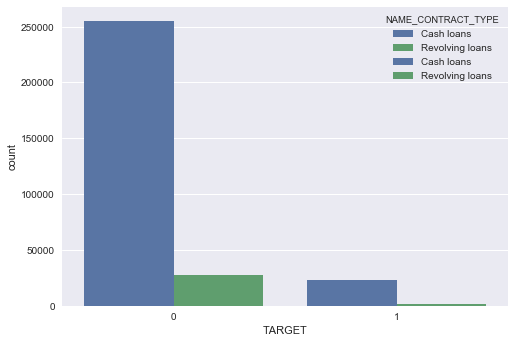

In [20]:
sns.countplot(x="TARGET", hue="NAME_CONTRACT_TYPE", data=application_train)
plt.show()

In [6]:
app_train_sum=DataSummary.returnSummaryDataFrame(application_train)

In [17]:
import seaborn as sns
sns.categorical(x="TARGET", y="AMT_ANNUITY", kind="box", data=application_train);

TypeError: 'module' object is not callable

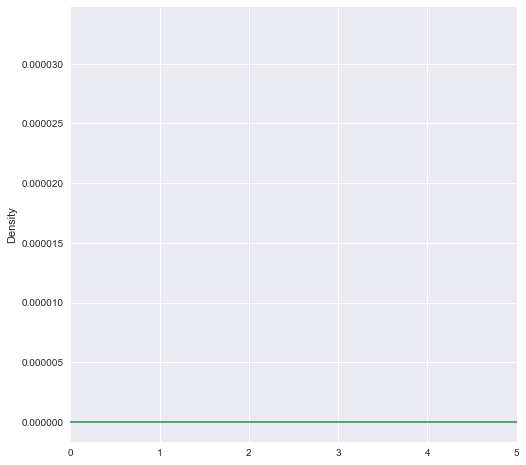

In [14]:
application_train["AMT_ANNUITY"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5))
plt.show()

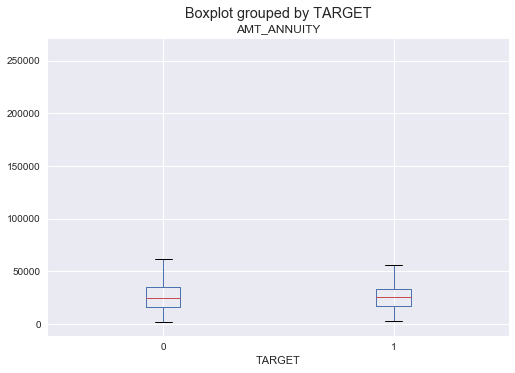

In [12]:
application_train.boxplot(column="AMT_ANNUITY", by= "TARGET")
plt.show()

In [7]:
app_train_sum['NAME_CONTRACT_TYPE']

col_type         object                          
count_unique     2                               
unique_values    ['Cash loans' 'Revolving loans']
missing_count    0                               
count            NaN                             
mean             NaN                             
std              NaN                             
min              NaN                             
25%              NaN                             
50%(median)      NaN                             
75%              NaN                             
max              NaN                             
mode             Cash loans                      
Name: NAME_CONTRACT_TYPE, dtype: object

In [49]:
np.nanmedian(application_train[application_train['TARGET'] == 0][['AMT_ANNUITY']])

24876.0

In [54]:
annuity_median_class_0=np.nanmedian(application_train[application_train['TARGET'] == 0][['AMT_ANNUITY']])
annuity_mean_class_0=np.nanmean(application_train[application_train['TARGET'] == 0][['AMT_ANNUITY']])
tmp=MissingValue.replaceValuesInColumns(data=application_train, val_to_replace=None, replace_with_val=annuity_median_class_0, columns=['AMT_ANNUITY'])

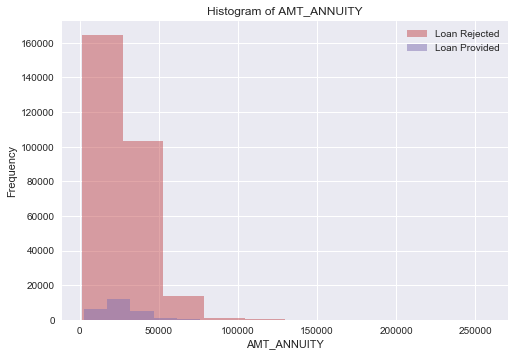

In [56]:
Visualization.createHistPlotForVarsForBinaryClass(data=tmp, label_column='TARGET', columns=['AMT_ANNUITY'], zero_meaning='Loan Rejected', one_meaning='Loan Approved')

In [12]:
home_credit_col_desc=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/HomeCredit_columns_description.csv",encoding = "ISO-8859-1")

In [13]:
home_credit_col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
DataSummary.returnSummaryDataFrame()